# Introduction to NetworkModelGrid
This tutorial provides a basic introduction to the ``NetworkModelGrid`` grid class in Landlab. 

In [1]:
# Start by importing necessary modules

from landlab.grid.network import NetworkModelGrid
import numpy as np

In [2]:
# define a grid, right now this is done by passing three datastructures:
# grid = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)

y_of_node = (0, 1, 2, 2)
x_of_node = (0, 0, -1, 1)
nodes_at_link = ((1, 0), (2, 1), (3, 1))
grid = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)


print(grid.x_of_node)
#array([ 0.,  0., -1.,  1.])
print(grid.y_of_node)
#array([ 0.,  1.,  2.,  2.])
print(grid.nodes_at_link)
#array([[0, 1],
#       [2, 1],
#       [1, 3]])

# we can store simple arrays at links and at nodes (complex things lower in the notebook)
grid.at_node['z'] = [1,2,3,4]
grid.at_link['z'] = [10,20,30]

[ 0.  0. -1.  1.]
[ 0.  1.  2.  2.]
[[0 1]
 [2 1]
 [1 3]]



# DISCUSSION ITEM:

What are other ways you'd like to be able to import a Network?

In [3]:
# methods that work for with only links and nodes on other landlab grids
# work here too. 

from landlab.grid.gradients import calc_grad_at_link
calc_grad_at_link(grid, 'z')
#array([ 1.        , -0.70710678,  1.41421356])

array([ 1.        , -0.70710678,  1.41421356])


# DISCUSSION ITEM:

Are there any methods that are not presently supported?

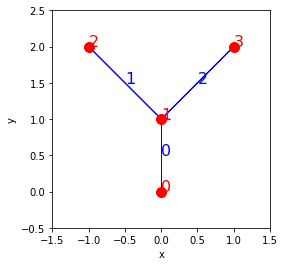

In [4]:
# there is a nice plotting function for simple graphs. 

from landlab.plot import graph
graph.plot_graph(grid, at='node,link')

In [5]:
# and we can save to the Ugrid format
grid.to_netcdf('network.nc')

In [6]:
# we think this should work, but its not working on Katy's computer
!ncdump -h network.nc

*** ncdump: ncopen failed on network.nc


In [7]:
ls

Example_Usage_of_Network_Model_Grid.ipynb
network.nc


In [8]:
# store values at links and nodes
z_link = grid.add_zeros('topographic__elevation', at='link')

print(z_link)

# store values at links and nodes
z_node = grid.add_zeros('topographic__elevation', at='node')

print(z_node)

# this might be buggy.

[ 0.  0.  0.]
[ 0.  0.  0.  0.]


In [9]:
# store profiles at links and nodes



In [10]:
# store ragged arrays at links and nodes
sediment_id = [np.array([0]),
                   np.array([3,5]),
                   np.array([2,1,4,6])]

grid.at_link['sediment_id']=sediment_id


water_id = [np.array([0]),
            np.array([3,5]),
            np.array([2,1,4,6]),
            np.array([8,9,10,11])]

grid.at_node['water_id']=water_id


#this works, but we don't know the efficiency.

# these could be sets, lists, numpy, 

In [11]:
grid.at_link['sediment_id']


array([array([0]), array([3, 5]), array([2, 1, 4, 6])], dtype=object)

#Discussion: What other things need to be stored on the Grid?
